In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv("data\Rport.csv")
df['Data'] = df['Data'].astype('datetime64[ns]')

In [23]:
df.describe()

,Equal Weights,HRP,MV
count,210.000000,210.000000,210.000000
mean,1.421487,1.153132,0.994879
std,7.158521,5.653732,5.100198
min,-31.222129,-24.552510,-19.159562
25%,-2.432378,-1.520388,-1.834484
50%,1.165318,0.971418,0.553035
75%,5.850250,5.104367,4.923248
max,28.407488,17.612941,17.813332


In [24]:
sns.set(rc = {'figure.figsize':(30,8)})

<AxesSubplot: xlabel='Data', ylabel='value'>

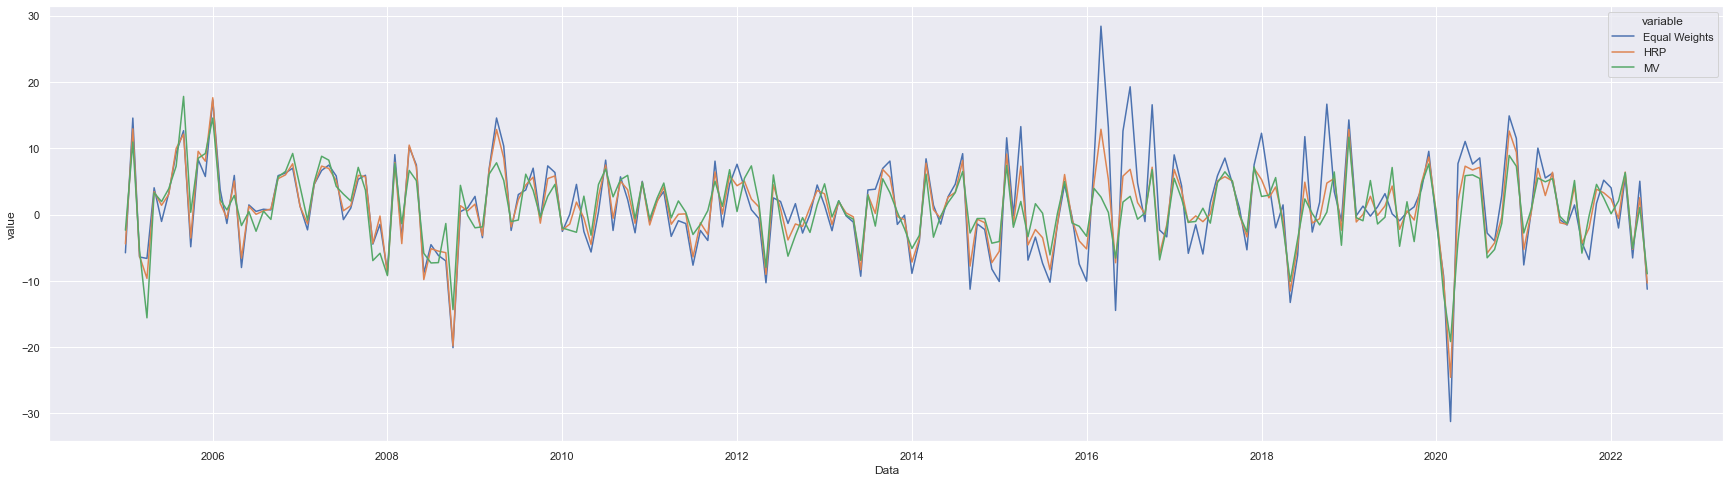

In [25]:
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

### Pandemic Window

<AxesSubplot: xlabel='Data', ylabel='value'>

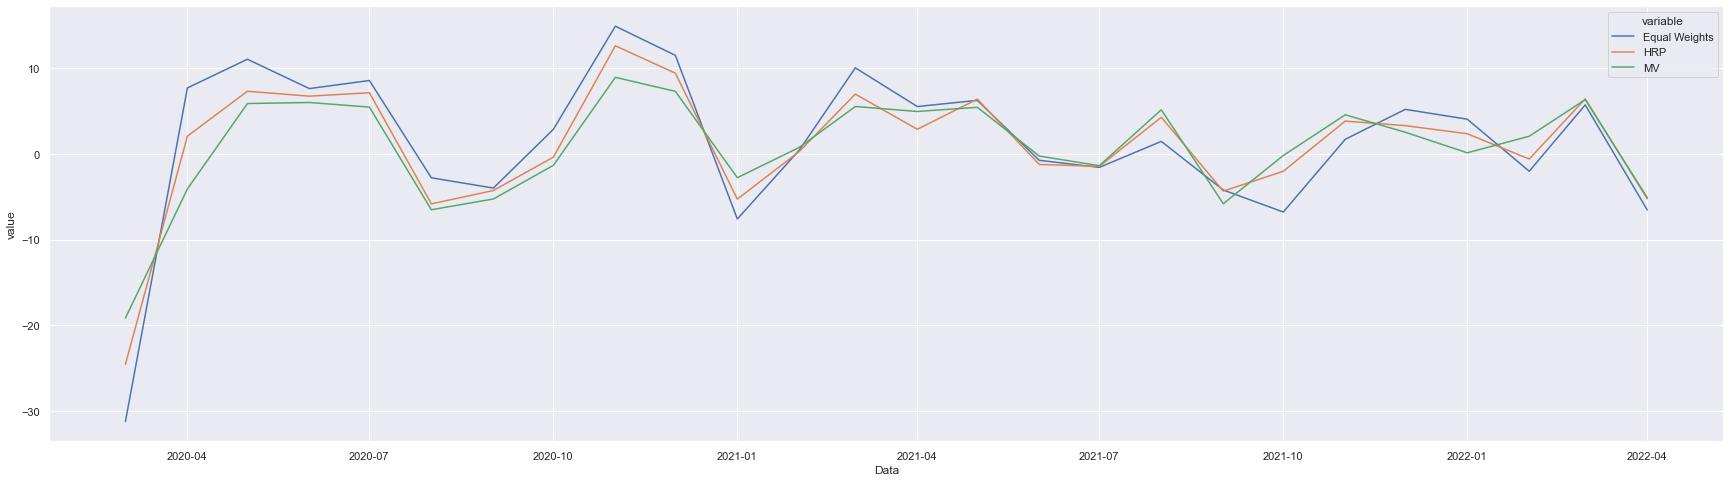

In [26]:
pandemic_df = df.loc[(df['Data'] >= '2020-03-01') & (df['Data'] < '2022-04-15')]
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(pandemic_df, ['Data']))


In [27]:
df['Ano'] = df['Data'].astype('datetime64[ns]')
df['Ano'] = df['Data'].dt.year.astype(int)

In [28]:
df_mean_by_year = df.groupby(['Ano'], as_index=False).mean()
df_median_by_year = df.groupby(['Ano'], as_index=False).median()
df_std_by_year = df.groupby(['Ano'], as_index=False).std()

# AV

<AxesSubplot: xlabel='Ano', ylabel='value'>

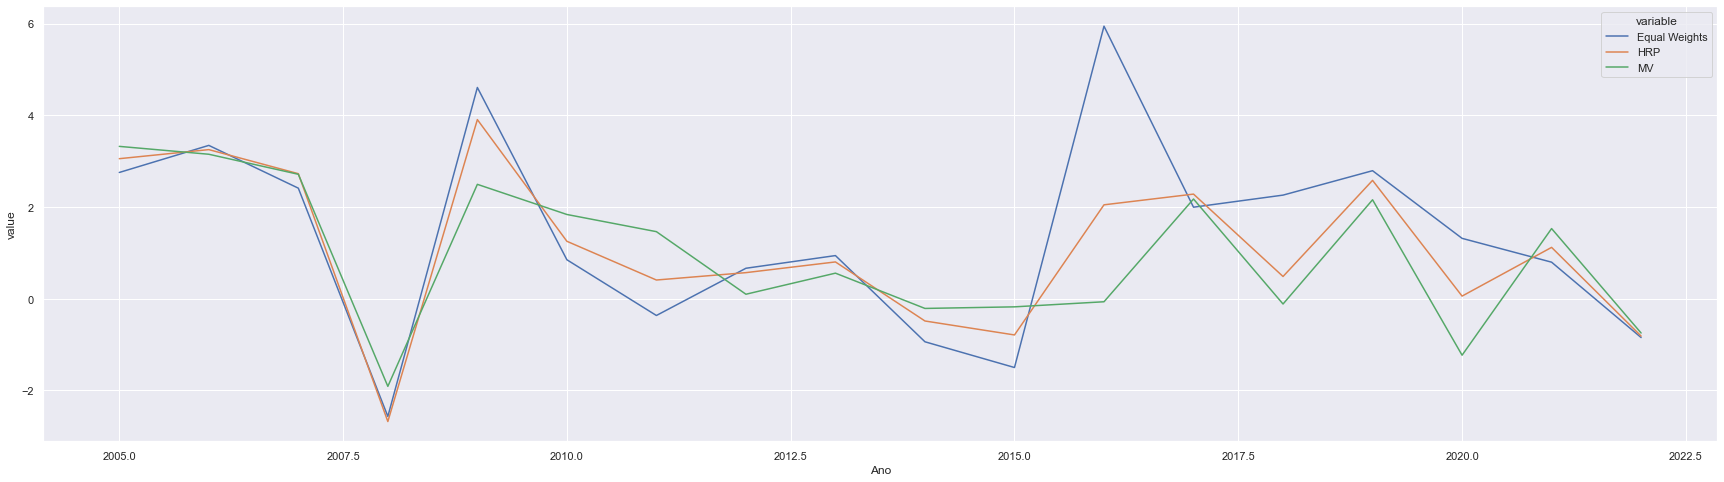

In [29]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_mean_by_year, ['Ano']))


# AV Median

In [ ]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_median_by_year, ['Ano']))


# SD

<AxesSubplot: xlabel='Ano', ylabel='value'>

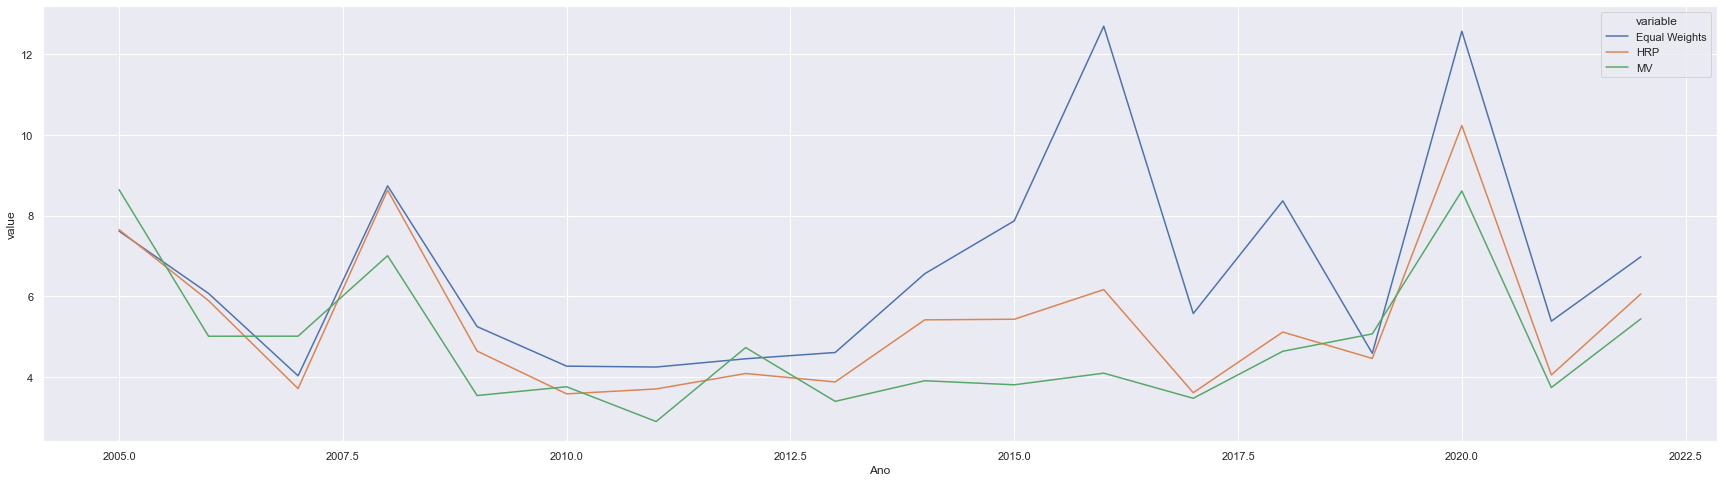

In [31]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))


#### Esse está correto ou seria o de cima?

<AxesSubplot: xlabel='Ano', ylabel='value'>

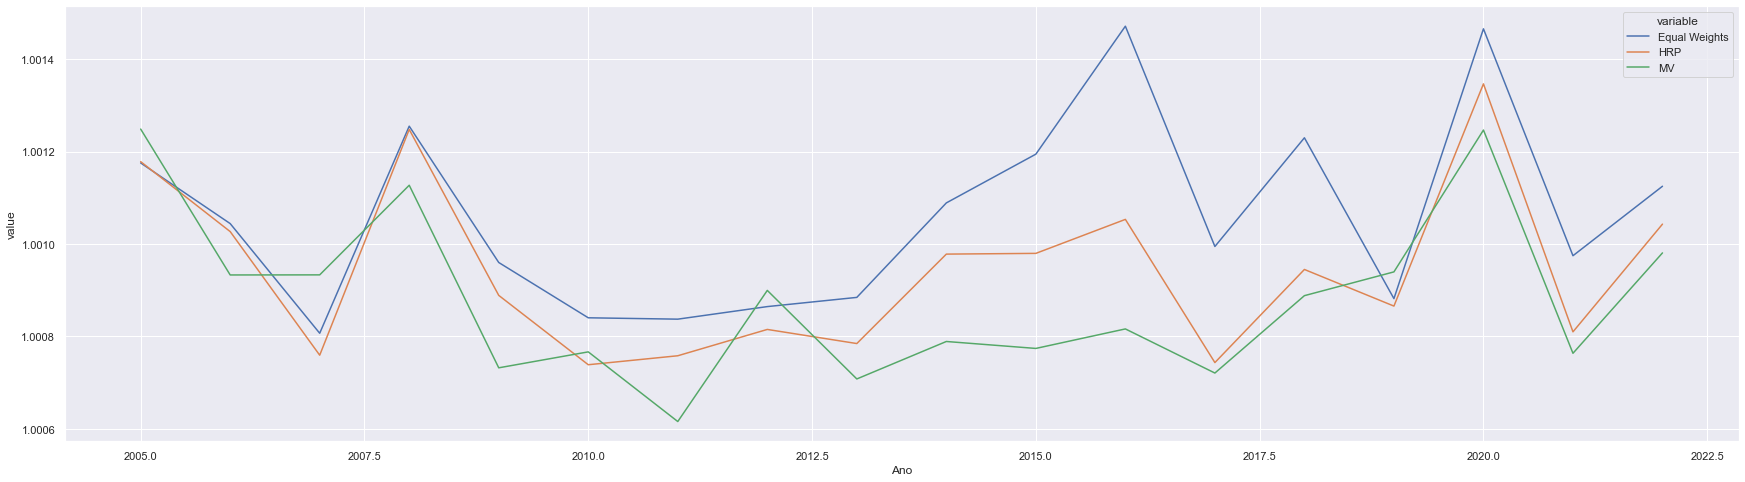

In [54]:
df_std_by_year['Equal Weights'] = df_std_by_year['Equal Weights'].pow(1/12)
df_std_by_year['HRP'] = df_std_by_year['HRP'].pow(1/12)
df_std_by_year['MV'] = df_std_by_year['MV'].pow(1/12)
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))